In [0]:
# imports for array-handling and plotting
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.utils import np_utils,to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

Using TensorFlow backend.


# Dataset Preparation

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #Import MNIST from Keras
y_vis = y_train

In [65]:
X_train.shape

(60000, 28, 28, 1)

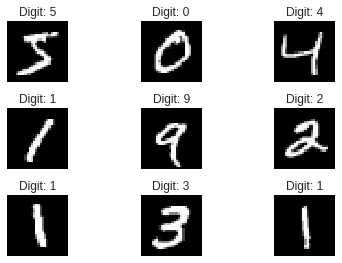

In [5]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.close()
fig

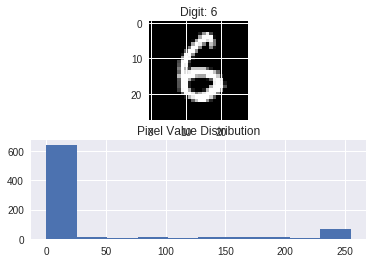

In [68]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[106], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[106]))
plt.subplot(2,1,2)
plt.hist(X_train[106].reshape(784))
plt.title("Pixel Value Distribution")
plt.close()
fig

In [8]:
print('X_train shape:', X_train.shape)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
##############   CONVERT DARKSPOTS TO TRUE VALUES #####################
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape) #X_train shape: (60000, 28, 28, 1)

X_train shape: (60000, 28, 28)
X_train shape: (60000, 28, 28, 1)


In [9]:
num_category = 10
print(y_train.shape)
y_train = to_categorical(y_train, num_category)
y_test = to_categorical(y_test, num_category)
print(y_train.shape)

(60000,)
(60000, 10)


In [10]:
######## CHECKING DATA SHAPES ###########
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:',y_train.shape)
print('X_train shape:', X_train.shape)

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
y_train shape: (60000, 10)
X_train shape: (60000, 28, 28, 1)


In [11]:
i = 106
print(y_vis[i])
print(y_train[i])

6
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# HD5 Weights saving

In [0]:
from keras.models import load_model

# Keras CNN Model

<h3><strong>Only implement load after model is already created</strong> </h3>

In [13]:
### Only run after first run###
model = load_model('Digits.h5')
model.summary()

OSError: ignored

<h3>Use model below to make changes to architecture</h3>

In [14]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding="same",activation='relu',input_shape =X_train[0].shape,name="CONV1"))
model.add(Conv2D(64,(3,3),padding="same",activation='relu',name = "Conv2"))
model.add(Conv2D(128,(3,3),padding="same",activation='relu',name = "Conv3"))
model.add(MaxPooling2D(pool_size=(2, 2),name = "MAX_POOL_1"))
model.add(BatchNormalization(name="Batch_Norm1"))
model.add(Dropout(0.4))
model.add(Conv2D(32,(5,5),padding="same",activation='relu',name = "Conv4"))
model.add(Conv2D(64,(5,5),padding="same",activation='relu',name = "Conv5"))
model.add(Conv2D(128,(5,5),padding="same",activation='relu',name = "Conv6"))
model.add(MaxPooling2D(pool_size=(2, 2),name = "MAX_POOL_2"))
model.add(BatchNormalization(name="Batch_Norm2"))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu',name="Dense1"))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss=categorical_crossentropy,
              optimizer= Adam(),
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CONV1 (Conv2D)               (None, 28, 28, 32)        320       
_________________________________________________________________
Conv2 (Conv2D)               (None, 28, 28, 64)        18496     
_________________________________________________________________
Conv3 (Conv2D)               (None, 28, 28, 128)       73856     
_________________________________________________________________
MAX_POOL_1 (MaxPooling2D)    (None, 14, 14, 128)       0         
_________________________________________________________________
Batch_Norm1 (BatchNormalizat (None, 14, 14, 128)       512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 128)       0         
_________________________________________________________________
Conv4 (Conv2D)               (None, 14, 14, 32)        102432    
__________

In [15]:
model_log = model.fit(X_train,y_train,epochs=4,validation_split=0.2,batch_size= 100,verbose=1,shuffle=True)
model.save('Digits.h5')

Train on 48000 samples, validate on 12000 samples
Epoch 1/4
48000/48000 [==============================] - 37s 763us/step - loss: 0.2885 - acc: 0.9161 - val_loss: 0.0811 - val_acc: 0.9787
Epoch 2/4
48000/48000 [==============================] - 33s 688us/step - loss: 0.0961 - acc: 0.9734 - val_loss: 0.1111 - val_acc: 0.9769
Epoch 3/4
48000/48000 [==============================] - 33s 685us/step - loss: 0.0710 - acc: 0.9803 - val_loss: 0.0400 - val_acc: 0.9916
Epoch 4/4
48000/48000 [==============================] - 33s 686us/step - loss: 0.0617 - acc: 0.9828 - val_loss: 0.0535 - val_acc: 0.9865


In [16]:
score = model.evaluate(X_test, y_test, verbose=1)

10000/10000 [==============================] - 3s 286us/step


In [17]:
print('Test loss:', score[0]) #Test loss: 0.0296396646054
print('Test accuracy:', score[1]) #Test accuracy: 0.9904

Test loss: 0.04080750796288921
Test accuracy: 0.9891


In [0]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']
print(get_available_gpus())

['/device:GPU:0']


In [0]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("model_digit.h5")
print("Saved model to disk")

Saved model to disk


# Using your own image

In [0]:
from PIL import Image
import PIL.ImageOps 

In [122]:
############## ONLY RUN IF YOU'RE USING COLAB #########################
from google.colab import files
uploaded = files.upload()

Saving 62.png to 62.png


In [0]:
img = Image.open('62.png').convert('L').resize((28,28))
img = PIL.ImageOps .invert(img)
data = np.array( img, dtype='uint8' )

In [124]:
data.shape

(28, 28)

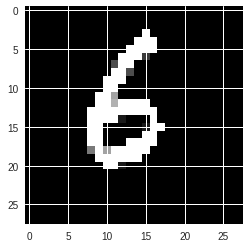

In [125]:
fig = plt.figure()
plt.imshow(data, cmap='gray', interpolation='none')
plt.close()
fig

In [0]:
def CNN_Size(data):
    if len(data.shape) != 4:
        data = np.expand_dims(data, axis=2)
        data = np.expand_dims(data, axis=0)
    return data

In [126]:
data = CNN_Size(data)
data.shape

(1, 28, 28, 1)

In [127]:
ans = model.predict(data, verbose = 1)

1/1 [==============================] - 0s 5ms/step


In [128]:
ans = decode(ans) 
print(ans)

6


In [0]:
def decode(datum):
    return np.argmax(datum)